In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.preprocessing import prepare_data, mcar_removal
from src.model_code import MH_regression, Gibbs_regression, running_mean
from src.diagnostics import MCMC_diagnostics

In [9]:
df = pd.read_csv('../student/student-mat.csv', sep=";")
features, target = prepare_data(df)

In [10]:
new_features = mcar_removal(features, 0.05)
new_features.dropna(inplace=True)
new_target = target[new_features.index].copy()
betas, sigmas = Gibbs_regression(new_features, new_target, B=20000)
thinned_betas = betas[:,::10]
results = pd.DataFrame(thinned_betas.T, columns = features.columns)

removing 19 entries for both features


C:\Users\Luke\.conda\envs\bayes\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Luke\.conda\envs\bayes\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


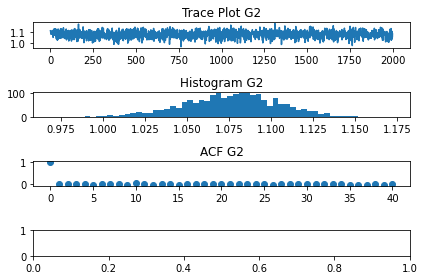

In [12]:
MCMC_diagnostics(results['G2'], 'G2')

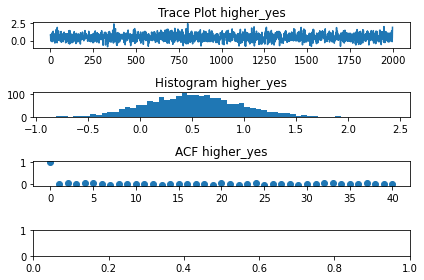

In [13]:
MCMC_diagnostics(results['higher_yes'], 'higher_yes')

In [14]:
for prop in [0.05, 0.1, 0.25, 0.5]:
    new_features = mcar_removal(features, prop)
    new_features.dropna(inplace=True)
    new_target = target[new_features.index].copy()
    betas, sigmas = Gibbs_regression(new_features, new_target, B=20000)
    thinned_betas = betas[:,::10]
    results = pd.DataFrame(thinned_betas.T, columns = features.columns)
    results.to_csv(f'results/02_dists_{prop}.csv', index=False)

removing 19 entries for both features
removing 39 entries for both features
removing 98 entries for both features
removing 197 entries for both features
